In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment',None) #waring 방지용
import numpy as np

data=pd.read_csv('data/공공보건의료기관현황.csv', index_col=0, encoding='cp949')
data.head()

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [2]:
# 강원도 춘천시 충열로 142번길 24-16
addr = pd.DataFrame(data['주소'].apply(lambda v:v.split()[:2]).tolist())
addr.columns=['시도','군구']
addr.head()

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


In [3]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [4]:
df = pd.DataFrame([[50,66,77,88,99],[99,100,88,89,50]]).T
df.columns=['국어','영어']
df.index=['철수','짱구','훈이','유리','맹구']

# 모든 셀에 적용하기
score_sqrt = df.apply(np.sqrt)

# 특정 column에 적용하기 => DataFrame 반환
kor_sqrt1 = pd.DataFrame(df['국어'].apply(np.sqrt))

# 특정 column에 적용하기 => Series 반환
kor_sqrt2 = df['국어'].apply(np.sqrt)
type(kor_sqrt2) # Serries

# 람다식 사용하여 특정 column 적용하기
kor_sqrt3 = df['국어'].apply(lambda v:v*2)

# 람다식 사용하여 특정 column 적용하기 => 다중 리스트 반환
kor_sqrt4 = pd.DataFrame(df['국어'].apply(lambda v: list(str(v))))
kor_sqrt5 = pd.DataFrame(df['국어'].apply(lambda v: list(str(v))).tolist())

# index/column 적용하기
score_sqrt2 = df.apply(np.average,axis=0) #국어,영어 평균
score_sqrt3 = df.apply(np.average,axis=1) #학생별 평균
kor_sqrt3

철수    100
짱구    132
훈이    154
유리    176
맹구    198
Name: 국어, dtype: int64

In [5]:
#addr.loc[addr['시도']=='창원시', :]

addr[addr['시도']=='창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [6]:
# addr.loc[addr['시도']=='창원시','시도']=['경상남도','창원시']
# addr[addr['시도']=='경상남도']

# addr.iloc[27]=['경상남도','창원시']
# addr.iloc[31]=['경상남도','창원시']

addr.loc[addr['시도']=='창원시',:]=['경상남도','창원시']
addr.loc[addr['시도']=='경상시',:]=['경상북도','경산시']
addr.loc[addr['시도']=='천안시',:]=['충청남도','천안시']

addr[(addr['시도']=='경상남도') & (addr['군구']=='창원시')]
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경산시', '경북', '인천광역시',
       '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도',
       '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시',
       '전북', '충청북도'], dtype=object)

In [7]:
## 표준 행정구역 이름으로 수정 :  경기 -> 경기도, 경남 -> 경상남도, ...
addr_aliases = {'경기':'경기도', '경남':'경상남도', '경북':'경상북도', '충북':'충청북도', 
                '서울시':'서울특별시', '부산특별시':'부산광역시', '대전시':'대전광역시', 
                '충남':'충청남도', '전남':'전라남도', '전북':'전라북도'}

In [8]:
addr['시도']=addr['시도'].apply(lambda x : addr_aliases.get(x,x))

In [9]:
addr['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '경산시', '인천광역시', '대구광역시', '전라남도',
       '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시',
       '충청남도', '울산광역시'], dtype=object)

In [10]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경안로', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '경산시', '양평군', '수성구', '달성군',
       '연수구', '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시',
       '고흥군', '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구',
       '양천구', '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군',
       '무안군', '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군',
       '정읍시', '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시',
       '서산

In [11]:
addr[addr['군구']=='아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [12]:
addr.iloc[75]=['제주특별자치도', '제주시']

In [13]:
addr['시도군구']= addr.apply(
    lambda x:x['시도']+' '+x['군구'], axis=1)
addr.head()

,시도,군구,시도군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시


In [14]:
addr['count']=0
addr.head()

,시도,군구,시도군구,count
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0


In [15]:
addr.loc[addr['시도군구']=='강원도 춘천시']

,시도,군구,시도군구,count
0,강원도,춘천시,강원도 춘천시,0
6,강원도,춘천시,강원도 춘천시,0
69,강원도,춘천시,강원도 춘천시,0
105,강원도,춘천시,강원도 춘천시,0
142,강원도,춘천시,강원도 춘천시,0


In [16]:
addr_group =pd.DataFrame(addr.groupby(['시도', '군구', '시도군구'], as_index=False).count())
addr_group.head()  #작업 확인용 출력

,시도,군구,시도군구,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1


In [17]:
addr_group = addr_group.set_index('시도군구')
addr_group.head()

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


In [18]:
popul=pd.read_excel('data/행정구역_시군구_별__성별_인구수.xlsx')
popul.head()

,행정구역(시군구)별,행정구역(시군구)별.1,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51583722,25715591,25868131
1,서울특별시,소계,9496887,4607440,4889447
2,서울특별시,종로구,143850,69638,74212
3,서울특별시,중구,122054,59368,62686
4,서울특별시,용산구,222083,106666,115417


In [19]:
#공백 제거하기

popul = popul.rename(columns={'행정구역(시군구)별':'시도',
                              '행정구역(시군구)별.1':'군구'})

popul.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51583722,25715591,25868131
1,서울특별시,소계,9496887,4607440,4889447
2,서울특별시,종로구,143850,69638,74212
3,서울특별시,중구,122054,59368,62686
4,서울특별시,용산구,222083,106666,115417


In [20]:
# popul.loc[popul['군구']=='소계', '군구'] ='     소계'
# popul.loc[popul['군구']=='     소계']
# popul['군구'] = popul['군구'].apply(lambda x : x.strip())

for element in range(0,len(popul)):
    popul['군구'][element]=popul['군구'][element].strip()
# popul.loc[popul['군구']=='소계']

In [21]:
popul['시도군구']=popul.apply(lambda r: r['시도']+ ' ' + r['군구'], axis=1)
popul.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,소계,51583722,25715591,25868131,전국 소계
1,서울특별시,소계,9496887,4607440,4889447,서울특별시 소계
2,서울특별시,종로구,143850,69638,74212,서울특별시 종로구
3,서울특별시,중구,122054,59368,62686,서울특별시 중구
4,서울특별시,용산구,222083,106666,115417,서울특별시 용산구


In [22]:
popul = popul[popul['군구']!='소계']
popul.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
2,서울특별시,종로구,143850,69638,74212,서울특별시 종로구
3,서울특별시,중구,122054,59368,62686,서울특별시 중구
4,서울특별시,용산구,222083,106666,115417,서울특별시 용산구
5,서울특별시,성동구,284173,138373,145800,서울특별시 성동구
6,서울특별시,광진구,340062,164091,175971,서울특별시 광진구


In [23]:
popul =popul.set_index('시도군구')
popul.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,143850,69638,74212
서울특별시 중구,서울특별시,중구,122054,59368,62686
서울특별시 용산구,서울특별시,용산구,222083,106666,115417
서울특별시 성동구,서울특별시,성동구,284173,138373,145800
서울특별시 광진구,서울특별시,광진구,340062,164091,175971


In [24]:
addr_population_merge2 = pd.merge(addr_group,popul,  how='inner')
addr_population_merge2.head()  

,시도,군구,count,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,강원도,강릉시,4,212414,105385,107029
1,강원도,동해시,1,89618,45558,44060
2,강원도,삼척시,1,64216,32487,31729
3,강원도,속초시,1,82725,41037,41688
4,강원도,양구군,1,21635,11359,10276


In [27]:
addr_merge = pd.merge(addr_group, popul, how='inner', left_index=True, right_index=True)
addr_merge.head()

,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,212414,105385,107029
강원도 동해시,강원도,동해시,1,강원도,동해시,89618,45558,44060
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,64216,32487,31729
강원도 속초시,강원도,속초시,1,강원도,속초시,82725,41037,41688
강원도 양구군,강원도,양구군,1,강원도,양구군,21635,11359,10276


In [30]:
local_mc_popul = addr_merge[['시도_x','군구_x','count','총인구수 (명)']]
local_mc_popul.head()

,시도_x,군구_x,count,총인구수 (명)
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,212414
강원도 동해시,강원도,동해시,1,89618
강원도 삼척시,강원도,삼척시,1,64216
강원도 속초시,강원도,속초시,1,82725
강원도 양구군,강원도,양구군,1,21635


In [31]:
local_mc_popul = local_mc_popul.rename(
    columns = {'시도_x': '시도', '군구_x': '군구',
               '총인구수 (명)': '인구수' })
local_mc_popul.head()  #작업 확인용 출력

,시도,군구,count,인구수
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,212414
강원도 동해시,강원도,동해시,1,89618
강원도 삼척시,강원도,삼척시,1,64216
강원도 속초시,강원도,속초시,1,82725
강원도 양구군,강원도,양구군,1,21635


In [32]:
mc_count = local_mc_popul['count'] #의료 기관 수
mc_popul = local_mc_popul['인구수'] #인구수
local_mc_popul['비율']=mc_count.div(mc_popul, axis=0) * 100000
local_mc_popul.head()

,시도,군구,count,인구수,비율
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,212414,1.883115
강원도 동해시,강원도,동해시,1,89618,1.115847
강원도 삼척시,강원도,삼척시,1,64216,1.557244
강원도 속초시,강원도,속초시,1,82725,1.208824
강원도 양구군,강원도,양구군,1,21635,4.622140


In [33]:
from matplotlib import pyplot as plt
from matplotlib import rcParams, style

style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [44]:
ratio = local_mc_popul[['count']] # DataFrame 으로 반환
# ratio = local_mc_popul[['count']] # Series 로 반환
ratio.head()

,count
시도군구,
강원도 강릉시,4
강원도 동해시,1
강원도 삼척시,1
강원도 속초시,1
강원도 양구군,1


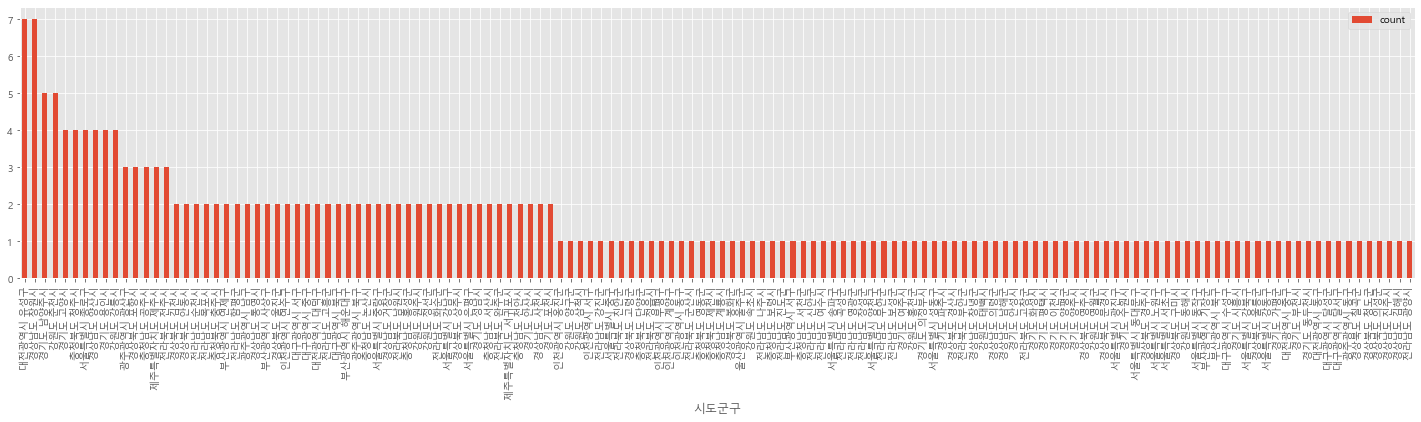

In [52]:
#ascending=True : 오름차순
#ascending=False: 내림차순
ratio = ratio.sort_values('count',ascending=False)
plt.rcParams['figure.figsize']=(25,5)

ratio.plot(kind='bar', rot=90)
plt.show()

In [60]:
ddk =pd.read_csv('data/data_draw_korea.csv', index_col=0, encoding='utf-8')
ddk.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [64]:
ddk['시도군구'] = ddk.apply(lambda x:x['광역시도']+' '+x['행정구역'], axis=1)
ddk.head()

,인구수,shortName,x,y,면적,광역시도,행정구역,시도군구
시도군구,,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시,강원도 강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군,강원도 고성군
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시,강원도 동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시,강원도 삼척시
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시,강원도 속초시


In [65]:
ddk = ddk.set_index('시도군구')
ddk.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시


In [66]:
ddk2 = pd.merge(ddk,local_mc_popul,how='inner',
                left_index=True, right_index=True)
ddk2.head()

,인구수_x,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,인구수_y,비율
시도군구,,,,,,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시,강원도,강릉시,4,212414,1.883115
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시,강원도,동해시,1,89618,1.115847
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시,강원도,삼척시,1,64216,1.557244
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시,강원도,속초시,1,82725,1.208824
강원도 양구군,20809,양구,8,0,700.80,강원도,양구군,강원도,양구군,1,21635,4.622140


In [67]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

In [148]:
def draw_blockmap(blockedMap, targetData, title, color):
    white_label_min = (max(blockedMap[targetData])
                       - min(blockedMap[targetData])
                      )*0.25 + min(blockedMap[targetData])
    print(white_label_min)
    data_label = targetData
    
    vmin=min(blockedMap[targetData])
    vmax=max(blockedMap[targetData])
    
    map_data = blockedMap.pivot(index='y',
                                columns='x', 
                                values=targetData)
    
    masked_map_data= np.ma.masked_where(np.isnan(map_data),map_data)
    
    plt.figure(figsize=(8,50))
    plt.title(title)
    plt.pcolor(masked_map_data, 
               vmin=vmin, vmax=vmax, 
               cmap=color,
               edgecolor='#aaaaaa', linewidth=0.5)
    
    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > white_label_min else 'black'
        
        #광역시는 구 이름이 겹치는 경우가 많아서, 시 단위 이름도 같이 표시
        if (row['광역시도'].endswith('시') 
            and not row['광역시도'].startswith('세종')):
            
            dispname = '{}\n{}'.format(row['광역시도'][:2], 
                                       row['행정구역'][:-1])
            if len(row['행정구역'])<=2:
                dispname+=row['행정구역'][-1]
        else:
            dispname=row['행정구역'][:-1]
        
        #서대문구, 서귀포시 같이 이름이 3장인 경우에 작은 글자로 표시
        if(len(dispname.splitlines()[-1]))>=3:
            fontsize,linespacing = 9.5,1.5
        else:
            fontsize,linespacing = 11,1.2
           
        plt.annotate(dispname, 
                     (row['x']+0.5, row['y']+0.5), 
                     weight='bold',
                     fontsize=fontsize,
                     ha='center', va='center', 
                     color=annocolor,
                     linespacing=linespacing)
        
    

    # 시도 경계를 그린다
    for path in BORDER_LINES:
        ys,xs=zip(*path)
        plt.plot(xs,ys, c='black', lw=4)
            
    plt.gca().invert_yaxis()
    plt.gca().set_aspect(1)
    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(data_label)

    plt.tight_layout()
    plt.savefig('data/blockmap_'+targetData+'.png')
    plt.show()
           

2.5


C:\Users\LGuser\AppData\Local\Temp\ipykernel_15280\1188065050.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolor(masked_map_data,
C:\Users\LGuser\AppData\Local\Temp\ipykernel_15280\1188065050.py:64: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar(shrink=.1, aspect=10)


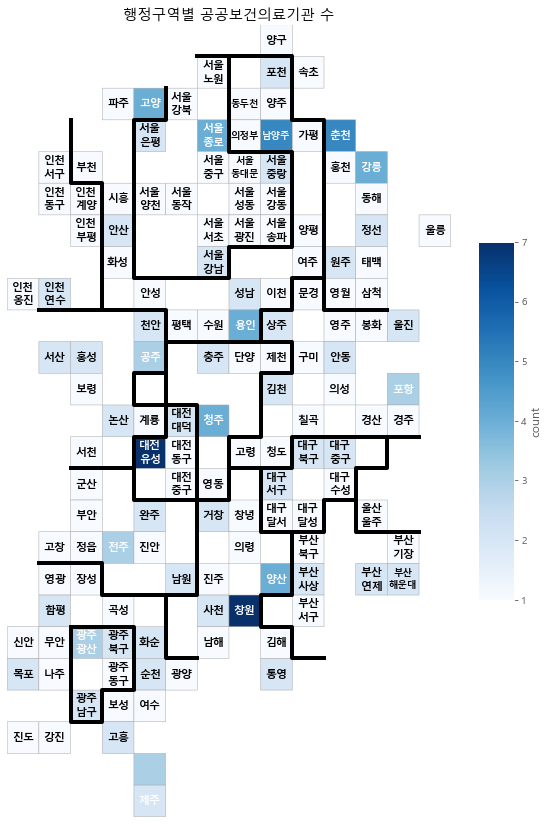

In [149]:
draw_blockmap(ddk2, 'count', '행정구역별 공공보건의료기관 수', 'Blues')

In [92]:
map_data = ddk2.pivot(index='y',columns='x', values='count')
map_data.head()

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,1.0,4.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,4.0,1.0,5.0,1.0,5.0,NaN,NaN,NaN
4,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,2.0,NaN,1.0,4.0,NaN,NaN


In [98]:
masked_map_data= np.ma.masked_where(np.isnan(map_data),map_data)
masked_map_data

masked_array(
  data=[[--, --, --, --, --, --, --, --, 1.0, --, --, --, --, --],
        [--, --, --, --, --, --, 1.0, --, 2.0, 1.0, --, --, --, --],
        [--, --, --, 1.0, 4.0, 1.0, --, 1.0, 1.0, --, --, --, --, --],
        [--, --, --, --, 2.0, --, 4.0, 1.0, 5.0, 1.0, 5.0, --, --, --],
        [--, 1.0, 1.0, --, --, --, 1.0, 1.0, 2.0, --, 1.0, 4.0, --, --],
        [--, 1.0, 1.0, 1.0, 1.0, 1.0, --, 1.0, 1.0, --, --, 1.0, --, --],
        [--, --, 1.0, 2.0, --, --, 1.0, 1.0, 1.0, 1.0, --, 2.0, --, 1.0],
        [--, --, --, 1.0, --, --, 2.0, --, --, 1.0, 2.0, 1.0, --, --],
        [1.0, 2.0, --, --, 1.0, --, --, 2.0, 1.0, 1.0, 1.0, 1.0, --, --],
        [--, --, --, --, 2.0, 1.0, 1.0, 4.0, 2.0, --, 1.0, 1.0, 2.0, --],
        [--, 2.0, 2.0, --, 3.0, --, 2.0, 1.0, 1.0, 1.0, 2.0, --, --, --],
        [--, --, 1.0, --, --, --, --, --, 2.0, --, 1.0, --, 3.0, --],
        [--, --, --, 2.0, 1.0, 2.0, 4.0, --, --, 1.0, --, 1.0, 1.0, --],
        [--, --, 1.0, --, 7.0, 1.0, --, 1.0, 1.0, 

In [113]:
for idx, row in ddk2.iterrows():
    if len(row['행정구역'])<=2:
        print(row['행정구역'])

남구
동구
북구
북구
서구
중구
동구
중구
북구
서구
중구
동구
서구


(3, 5, 5, 9, 9) (2, 2, 3, 3, 1)


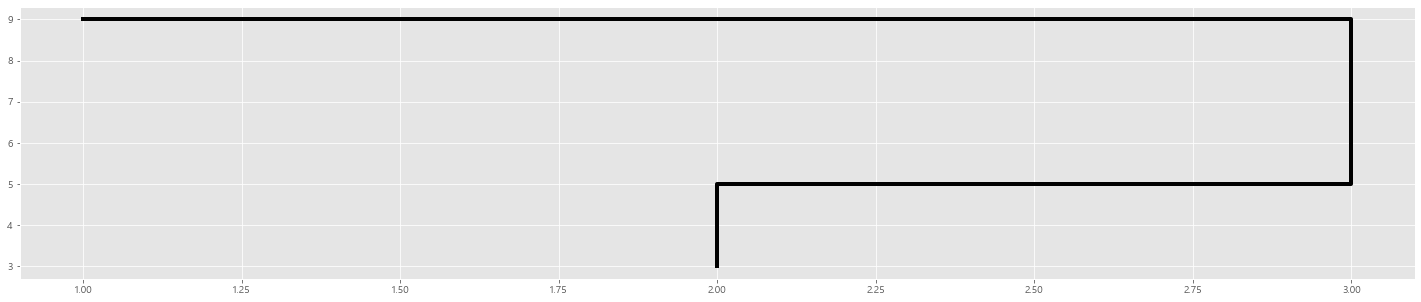

In [115]:

ys, xs = zip(*BORDER_LINES[0])
print(ys,xs)
plt.plot(xs,ys,c='black',lw=4)

2.8367524507165864


C:\Users\LGuser\AppData\Local\Temp\ipykernel_15280\1188065050.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolor(masked_map_data,
C:\Users\LGuser\AppData\Local\Temp\ipykernel_15280\1188065050.py:64: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar(shrink=.1, aspect=10)


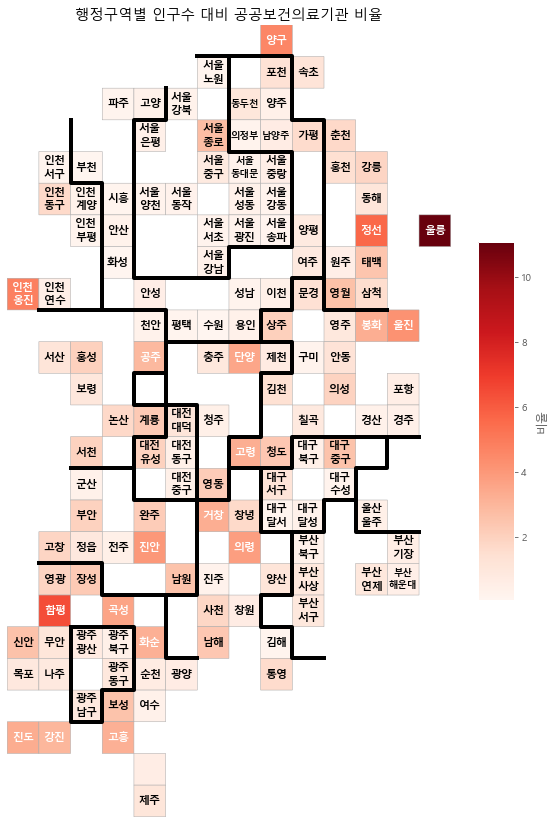

In [150]:
draw_blockmap(ddk2, '비율', '행정구역별 인구수 대비 공공보건의료기관 비율', 'Reds')